## Problem Set 1 
### Made by student of SkolTech German Devchich

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

**A. (5 pts)** Plot the probability density function p(x) of a one dimensional Gaussian distribution **N(x; 1,1).**
Hint: you might want to look at the library scipy.stats and use the function norm.pdf().

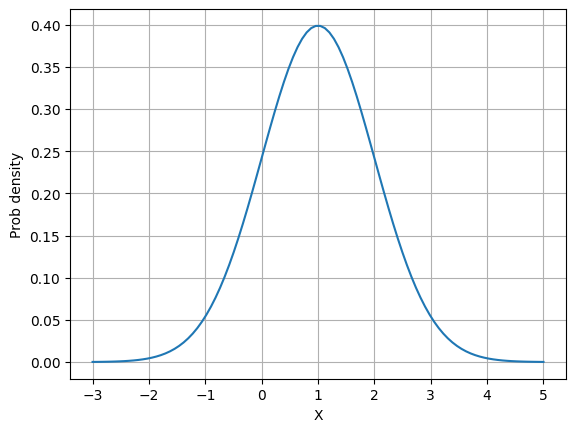

In [14]:
# plt.gca().set_aspect('equal')
x = np.linspace(-3,5,100)
y = stats.norm.pdf(x,1,1)

plt.plot(x,y)
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.grid()
plt.show()

**B. (5 pts)** Calculate the probability mass that the random variable X is less than 0, that is, Pr{X $\leq$ 0} $\int_{-\infty}^0 p(x)dx $ 

Hint: you might want to use the function norm.cdf().

Probability mass from -inf to 0 is : 0.15866


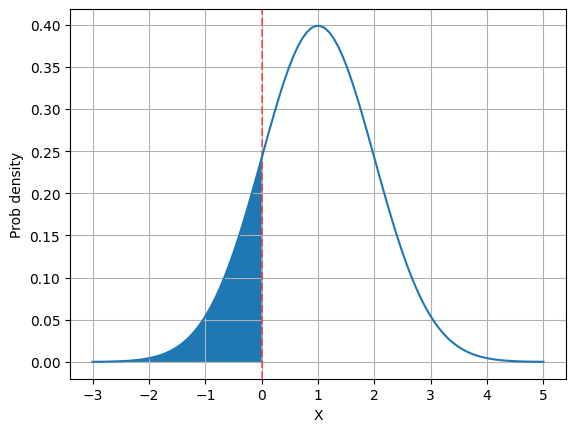

In [27]:
prob_mass = stats.norm.cdf(0,loc=1, scale=1) - stats.norm.cdf(-np.inf,loc=1, scale=1 )
print(f"Probability mass from -inf to 0 is : {np.round(prob_mass,5)}")

plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

tmp = np.linspace(-3,0)
y_tmp = stats.norm.pdf(tmp,1,1)
plt.fill_between(tmp,y_tmp)

plt.plot(x,y)
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.grid()
plt.show()

**C. (5 pts)** Consider the new observation variable $ z $, it gives information about the variable $ x $ by the likelihood function $ p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) $, with variance $ \sigma^2 = 0.2 $. Apply the Bayes’ theorem to derive the posterior distribution, $ p(x|z) $, given an observation $ z = 0.75 $ and plot it. For a better comparison, plot the prior distribution, $ p(x) $, too.

### Bayes' theorem:
$
p(x | z ) = \frac{p(z | x) p(x)}{p(z)}
$


$
p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) \\
$

Prior distribution 
$
p(x) = \mathcal{N}(x; 1,1) 
$


$$
p(x | z) \propto e^{-\left( \frac{x^2}{2\sigma_0^2} - \frac{2\mu_0 x}{2\sigma_0^2} + \frac{x^2}{2\sigma^2} - \frac{2z x}{2\sigma^2} \right)}
$$


$$
f(x) = A_1 A_2 e^{-\frac{x^2}{2} \left( \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2} \right) + x \left( \frac{\mu_1}{\sigma_1^2} + \frac{\mu_2}{\sigma_2^2} \right) - \frac{\mu_1^2}{2\sigma_1^2} - \frac{\mu_2^2}{2\sigma_2^2} }
$$

Если $(x) = \mathcal{N}(x; \mu_0,\sigma_0^2) $ и $p(z \mid x) = \mathcal{N}(z; x,\sigma^2$,
То постериор $p(x \mid z)$ тоже будет гауссианом со средним
$$
\mu_{\text{post}} \;=\;
\frac{\sigma_0^2}{\sigma_0^2 + \sigma^2}\,z \;+\;
\frac{\sigma^2}{\sigma_0^2 + \sigma^2}\,\mu_0
$$
и дисперсией
$$
\sigma_{\text{post}}^2 \;=\;
\frac{\sigma_0^2\,\sigma^2}{\sigma_0^2 + \sigma^2}.
$$

Another way to calculate use a numerical integration:
$$

p(x\mid z)\;=\;\frac{p(z\mid x)\,p(x)}{\int p(z\mid x')\,p(x')\,dx'}.
$$


In [58]:
sig_0_2 = 1
sig_z_2 = 0.2
mean_0 = 1
mean_z = x

z = 0.75

mean_post = (sig_0_2 / (sig_0_2 + sig_z_2)) * z + (sig_z_2 / (sig_0_2 + sig_z_2)) * mean_0
sig_post_2 = (sig_0_2 * sig_z_2) / (sig_z_2 + sig_0_2)
print(f"Expectation of posterior : {mean_post}")
print(f"Variance of posterior : {sig_post_2}")


def calculate_normalisation_coef():
    x = np.linspace(-1000,1000,100000)
    p_x = stats.norm.pdf(x,mean_0,np.sqrt(sig_0_2))
    p_z_x = stats.norm.pdf(z,x,np.sqrt(sig_z_2))
    dx = x[1] - x[0]
    coef = np.sum(p_z_x * p_x) * dx
    return coef
print(calculate_normalisation_coef())


Expectation of posterior : 0.7916666666666667
Variance of posterior : 0.16666666666666669
0.3548213064777798


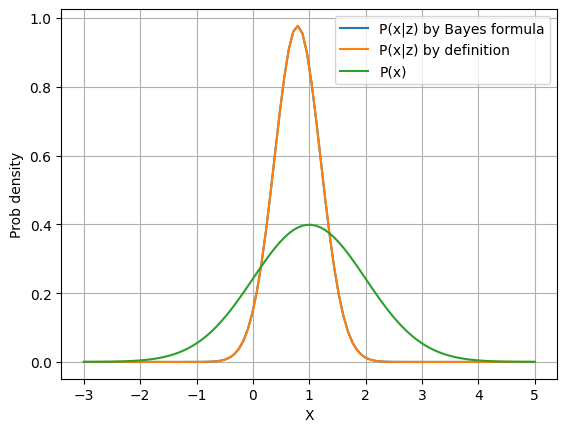

Is P(x|z) by Bayes formula close to P(x|z) by definition: True


In [67]:
# p_x_z_ = stats.norm.pdf(x,mean_post,np.sqrt(sig_post_2)) / calculate_normalisation_coef()
p_x = stats.norm.pdf(x,mean_0,np.sqrt(sig_0_2))
p_z_x = stats.norm.pdf(z,x,np.sqrt(sig_z_2))
p_x_z_def = p_z_x * p_x / calculate_normalisation_coef()

p_x_z_form = stats.norm.pdf(x, mean_post , np.sqrt(sig_post_2))
plt.plot(x,p_x_z_def, label = "P(x|z) by Bayes formula")
plt.plot(x,p_x_z_form, label = "P(x|z) by definition")
plt.plot(x,p_x, label = "P(x)")
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.legend()
plt.grid()
plt.show()
print(f"Is P(x|z) by Bayes formula close to P(x|z) by definition: {np.all(np.isclose(p_x_z_def,p_x_z_form))}")